In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Olympic_Swimming.csv")
df.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


,Year,Relay?,Rank
count,4359.000000,4359.000000,4359.000000
mean,1982.936453,0.169764,3.164946
std,26.928344,0.375468,1.189715
min,1912.000000,0.000000,0.000000
25%,1968.000000,0.000000,2.000000
50%,1988.000000,0.000000,4.000000
75%,2004.000000,0.000000,4.000000
max,2020.000000,1.000000,5.000000


The athlete with the most gold medals is Alexander Popov with 4 gold medals.


C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\1722919841.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gold_medals.values, y=top_gold_medals.index, palette='muted')


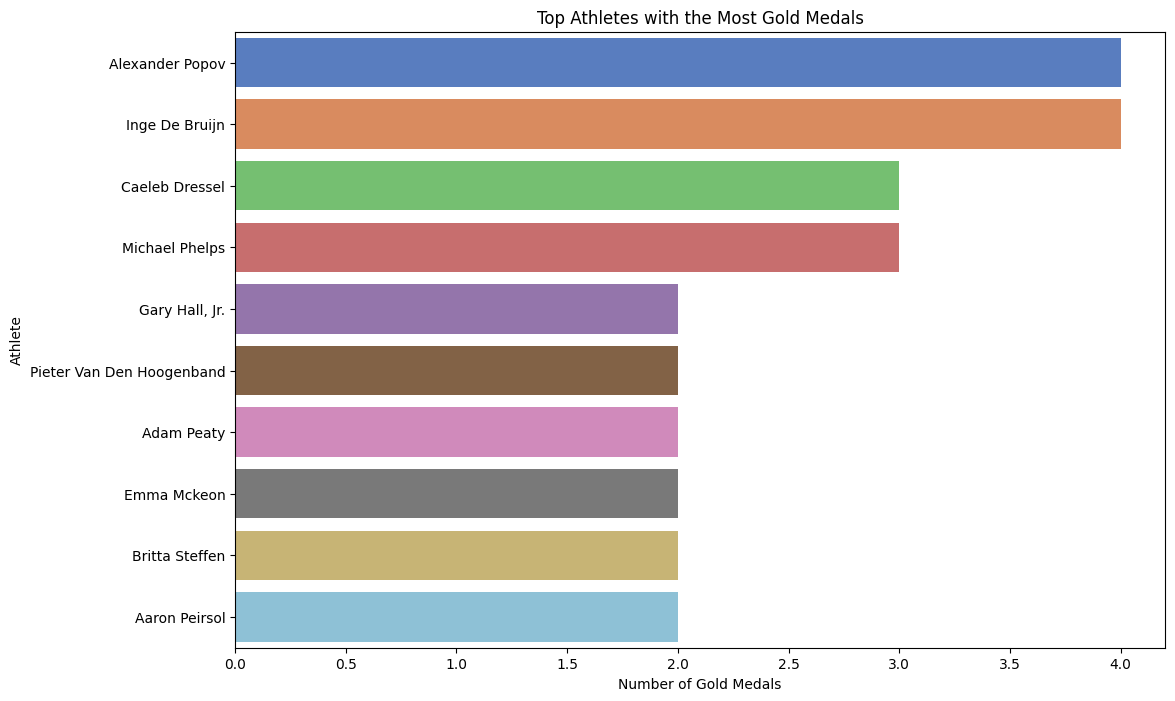

In [104]:
## Question 1: Who has won the most gold medals?

gold_medals = df[df['Rank'] == 1]
gold_medal_counts = gold_medals['Athlete'].value_counts()
most_gold_medals = gold_medal_counts.idxmax()
most_gold_medals_count = gold_medal_counts.max()
print(f'The athlete with the most gold medals is {most_gold_medals} with {most_gold_medals_count} gold medals.')

## Visualization

top_gold_medals = gold_medals['Athlete'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_gold_medals.values, y=top_gold_medals.index, palette='muted')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Athlete')
plt.title('Top Athletes with the Most Gold Medals')
plt.show()

World Record Times for Each Swimming Event:    Distance (in meters)        Stroke Gender         Athlete  Results
224                 100m    Backstroke    Men     Ryan Murphy    51.97
112                 100m    Backstroke  Women  Kaylee Mckeown    57.47
240                 100m  Breaststroke    Men      Adam Peaty    57.13
16                  100m     Butterfly    Men  Caeleb Dressel    49.45
264                 100m     Butterfly  Women  Sarah Sjostrom    55.48
24                  100m     Freestyle    Men  Caeleb Dressel    47.02
136                 100m     Freestyle  Women     Emma Mckeon    51.96
96                   50m     Freestyle    Men  Caeleb Dressel    21.07
208                  50m     Freestyle  Women     Emma Mckeon    23.81


C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\1377949529.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


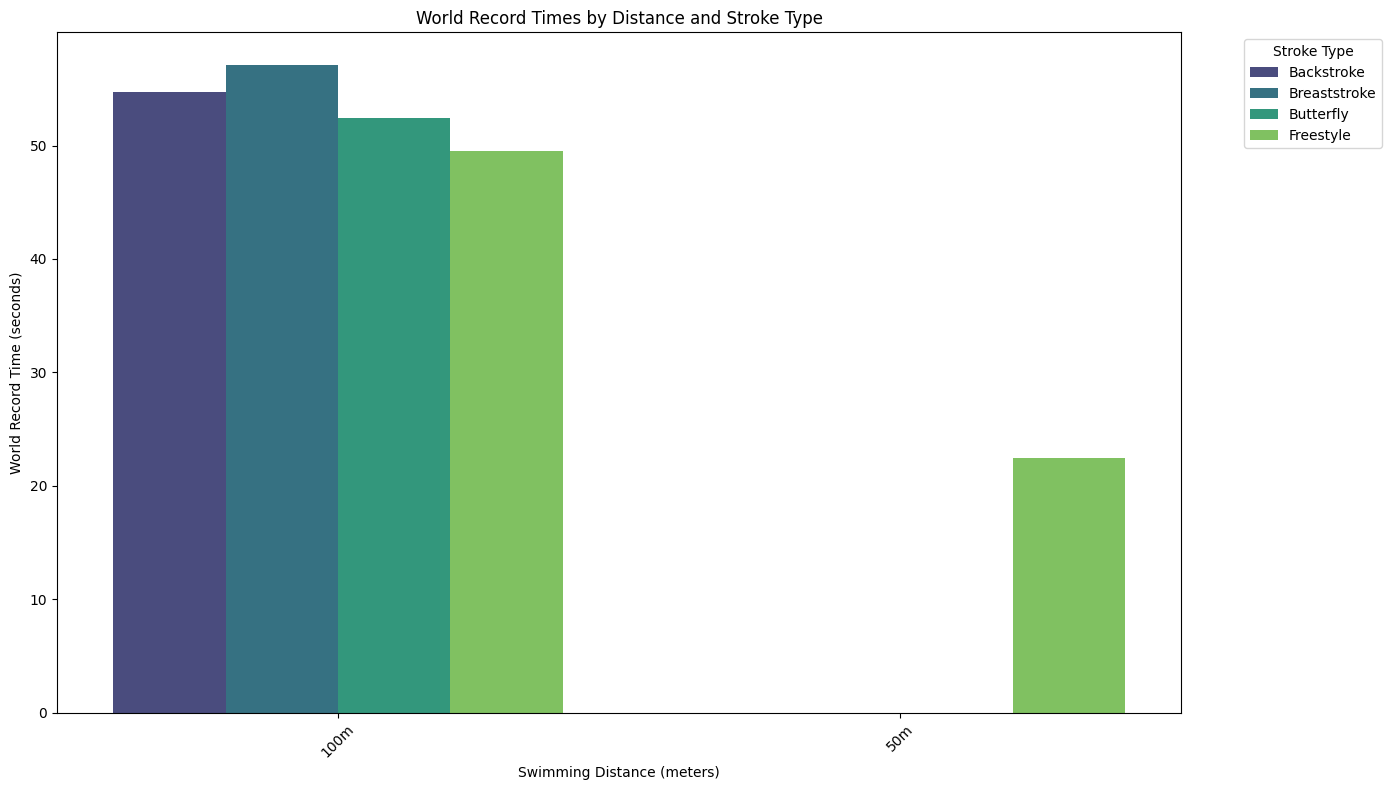

In [47]:
## Question 2: What are the world record times for each swimming event?

filtered_df = df[df['Rank'] != 5]
world_records = filtered_df.loc[filtered_df.groupby(['Distance (in meters)', 'Stroke', 'Gender'])['Results'].idxmin()]
world_records = world_records[['Distance (in meters)', 'Stroke', 'Gender', 'Athlete', 'Results']]
print(f'World Record Times for Each Swimming Event:{world_records}')

## Visualization

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Distance (in meters)',
    y='Results',
    hue='Stroke',
    data=world_records,
    palette='viridis',
    ci=None
)
plt.xlabel('Swimming Distance (meters)')
plt.ylabel('World Record Time (seconds)')
plt.title('World Record Times by Distance and Stroke Type')
plt.legend(title='Stroke Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\349542094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freestyle_times['Results'] = pd.to_numeric(freestyle_times['Results'], errors='coerce')


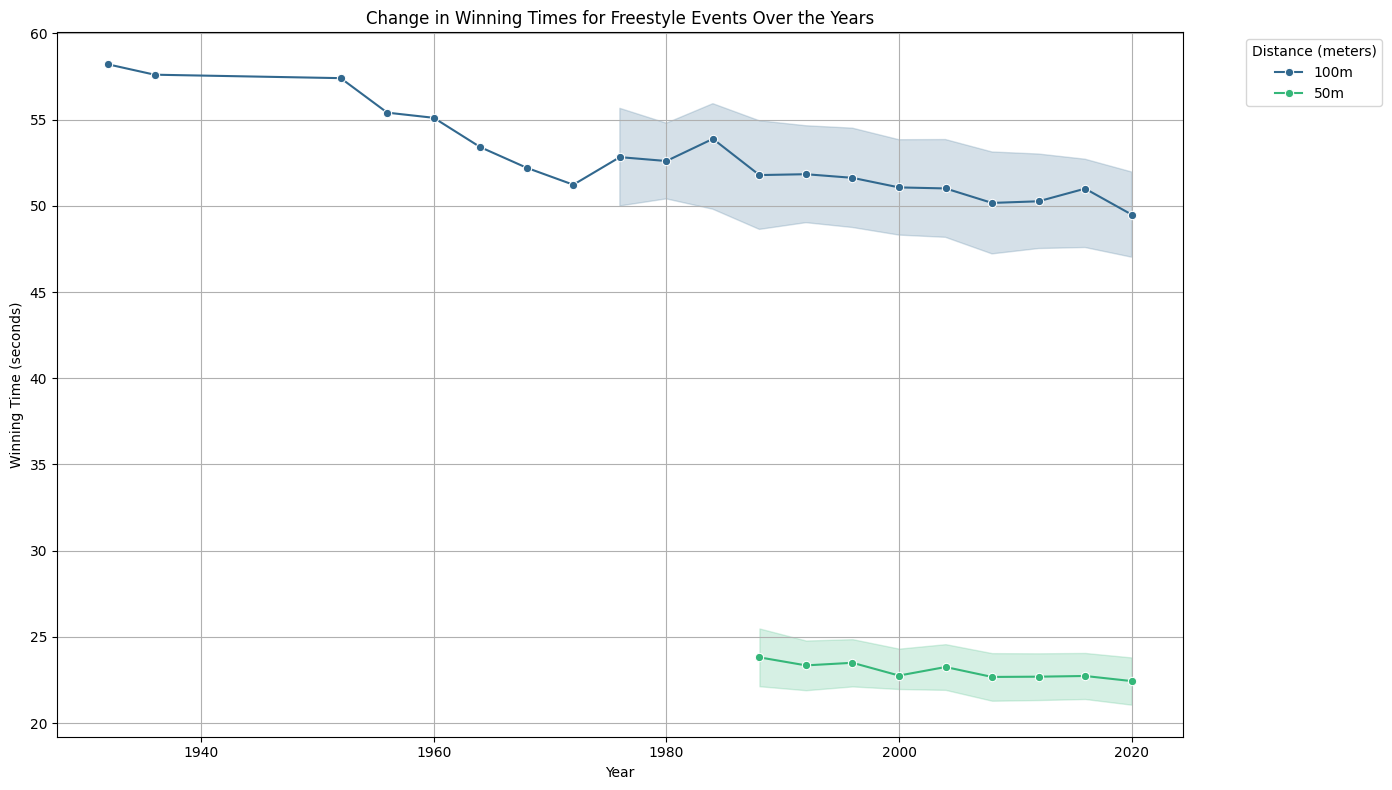

In [53]:
## Question 3: How have the winning times for freestyle events changed over the years?

freestyle_df = df[(df['Stroke'] == 'Freestyle') & (df['Rank'] == 1)]
freestyle_times = freestyle_df[['Year', 'Distance (in meters)', 'Results']]
freestyle_times['Results'] = pd.to_numeric(freestyle_times['Results'], errors='coerce')
freestyle_times = freestyle_times.dropna()

## Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=freestyle_times,
    x='Year',
    y='Results',
    hue='Distance (in meters)',
    marker='o',
    palette='viridis'
)
plt.xlabel('Year')
plt.ylabel('Winning Time (seconds)')
plt.title('Change in Winning Times for Freestyle Events Over the Years')
plt.legend(title='Distance (meters)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\2068729179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


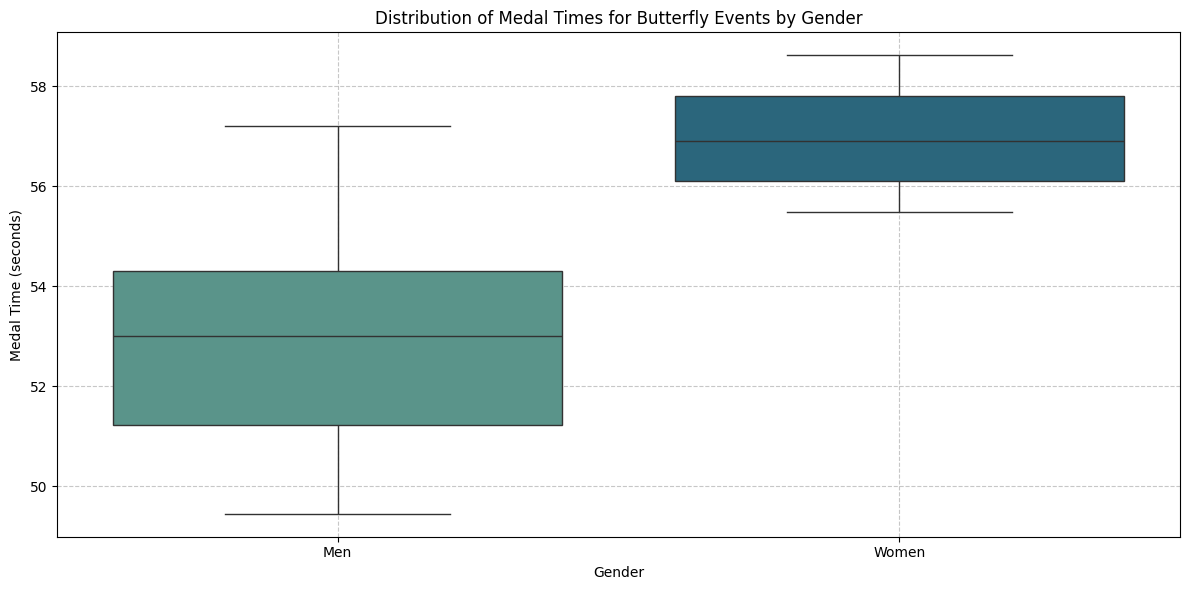

In [108]:
## Question 4: How does the average medal time differ between men and women in butterfly events?

butterfly_df = df[(df['Stroke'] == 'Butterfly') & (df['Rank'] <= 3)]
butterfly_df.loc[:, 'Results'] = pd.to_numeric(butterfly_df['Results'], errors='coerce')
butterfly_df = butterfly_df.dropna(subset=['Results'])

## Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Gender',
    y='Results',
    data=butterfly_df,
    palette = 'crest'
)
plt.xlabel('Gender')
plt.ylabel('Medal Time (seconds)')
plt.title('Distribution of Medal Times for Butterfly Events by Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Countries with Most Gold Medals:
  Country  Gold_Medals
0     USA           36
1     AUS            9
2     NED            8
3     GDR            5
4     RUS            3


C:\Users\Kevin\AppData\Local\Temp\ipykernel_24620\2022485423.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gold_Medals', y='Country', data=gold_medals_count, palette='viridis')


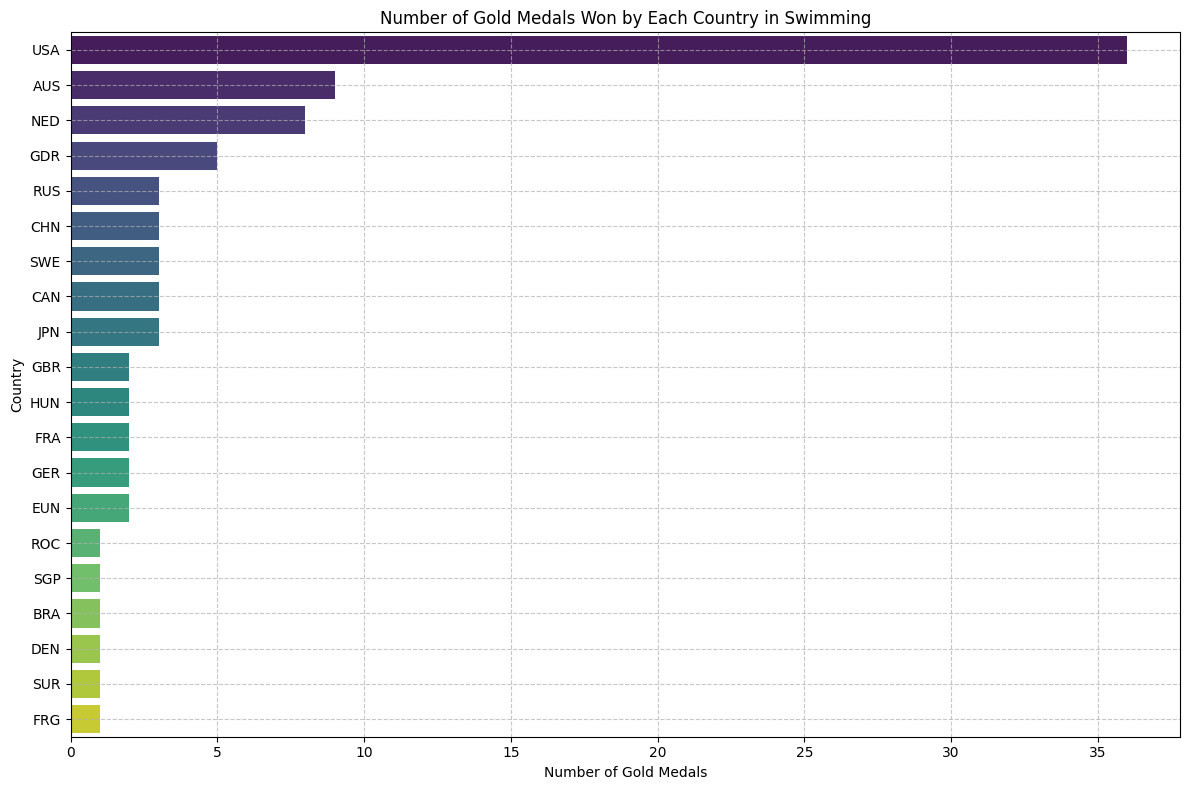

In [94]:
## Question 5: Which country has won the most gold medals in swimming across all years?

gold_medals_df = df[df['Rank'] == 1]
gold_medals_count = gold_medals_df['Team'].value_counts().reset_index()
gold_medals_count.columns = ['Country', 'Gold_Medals']
print("\nCountries with Most Gold Medals:")
print(gold_medals_count.head())

## Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Gold_Medals', y='Country', data=gold_medals_count, palette='viridis')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
plt.title('Number of Gold Medals Won by Each Country in Swimming')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()